In [34]:
# Step 1: Imports
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [35]:
# Step 2: Load dataset
df = pd.read_csv("Dataset/SQLi_Dataset.csv")

X = df[['Query']]
y = df['Label']

In [36]:
# Step 3: Balancing on Raw Queries
def balance_and_save(strategy, name):
  X_bal, y_bal = strategy.fit_resample(X, y)
  df_bal = pd.DataFrame(X_bal, columns=['Query'])
  df_bal['Label'] = y_bal
  df_bal.to_csv(f"Dataset/SQLi_{name}_Raw.csv", index=False)
  return df_bal

In [37]:
# Random Undersampling
rus = RandomUnderSampler(random_state=42)
df_rus_raw = balance_and_save(rus, "RUS")

In [38]:
# Random Oversampling
ros = RandomOverSampler(random_state=42)
df_ros_raw = balance_and_save(ros, "ROS")

In [39]:
# SMOTE : SMOTE doesn’t work on text or categorical data — it needs numeric vectors (e.g., from TF-IDF or embeddings).
# smote = SMOTE(random_state=42)
# df_smote_raw = balance_and_save(smote, "SMOTE")

In [40]:
# Also save original dataset
df.to_csv("Dataset/SQLi_Original_Raw.csv", index=False)

In [41]:
# # Step 4: TF-IDF Transformation (for ML models)

# vectorizer = TfidfVectorizer(max_features=1000)

# def tfidf_and_save(df_bal, name):
#   X_tfidf = vectorizer.fit_transform(df_bal['Query'])
#   X_tfidf_df = pd.DataFrame(X_tfidf.toarray(), columns=vectorizer.get_feature_names_out())

#   # OPTIONAL: Add Query column for reference
#   X_tfidf_df['Query'] = df_bal['Query'].values

#   X_tfidf_df['Label'] = df_bal['Label'].values

#   X_tfidf_df.to_csv(f"Dataset/SQLi_{name}_TFIDF.csv", index=False)
#   return X_tfidf_df

In [42]:
# # Apply TF-IDF to original
# tfidf_and_save(df, "Original")

In [43]:
# # Apply TF-IDF to RUS
# tfidf_and_save(df_rus_raw, "RUS")

In [44]:
# # Apply TF-IDF to ROS
# tfidf_and_save(df_ros_raw, "ROS")

In [45]:

# # Apply TF-IDF to original dataset and perform SMOTE
# X_tfidf_original = vectorizer.fit_transform(df['Query'])
# smote = SMOTE(random_state=42)
# X_smote, y_smote = smote.fit_resample(X_tfidf_original, y)

# # Save SMOTE TF-IDF data
# X_smote_df = pd.DataFrame(X_smote.toarray(), columns=vectorizer.get_feature_names_out())
# X_smote_df['Label'] = y_smote
# X_smote_df.to_csv("Dataset/SQLi_SMOTE_TFIDF.csv", index=False)

In [46]:
# Step 5: Visualization
def plot_distribution(labels, title):
  plt.figure(figsize=(5,4))
  pd.Series(labels).value_counts().sort_index().plot(kind='bar', color=['green', 'red'])
  plt.title(title)
  plt.xlabel("Class Label")
  plt.ylabel("Count")
  plt.xticks(rotation=0)
  plt.tight_layout()
  plt.show()

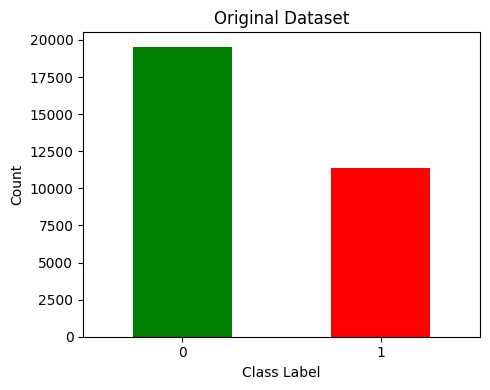

In [47]:
plot_distribution(y, "Original Dataset")

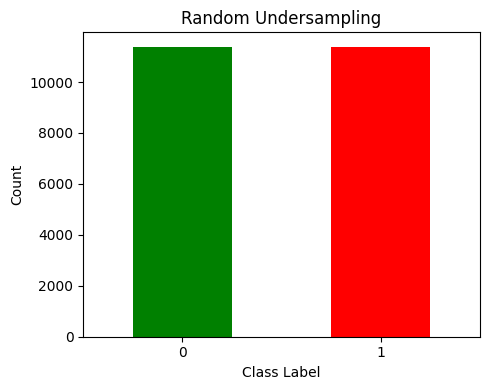

In [48]:
plot_distribution(df_rus_raw['Label'], "Random Undersampling")

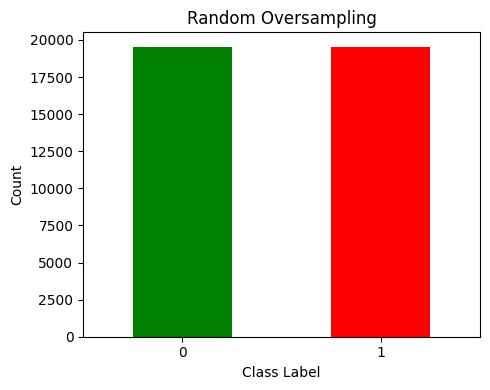

In [49]:
plot_distribution(df_ros_raw['Label'], "Random Oversampling")

In [50]:
# plot_distribution(y_smote, "SMOTE (TF-IDF)")